In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dfx = pd.read_csv('../Linear Regression (Challenge)/Linear_X_Train.csv')
dfy = pd.read_csv('../Linear Regression (Challenge)/Linear_Y_Train.csv')

In [3]:
dfx.head()

,x
0,-0.289307
1,-0.588810
2,1.027507
3,-0.259013
4,0.782043


In [4]:
dfy.head()

,y
0,-0.091101
1,-53.467721
2,75.457009
3,-12.025286
4,57.414187


In [9]:
X = dfx.values
Y = dfy.values.reshape((-1,))

In [10]:
print(X.shape)
print(Y.shape)

(3750, 1)
(3750,)


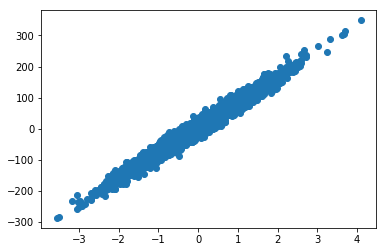

In [14]:
plt.scatter(X, Y)

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lr = LinearRegression(normalize=True)

In [17]:
lr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [20]:
pred = lr.predict(X)

In [21]:
pred.shape

(3750,)

In [24]:
lr.score(X, Y)*100

97.09612233822354

In [26]:
pred[:4]

array([-19.57388181, -43.69687794,  86.48717332, -17.13386193])

In [27]:
Y[:4]

array([ -0.09110112, -53.46772085,  75.45700878, -12.02528565])

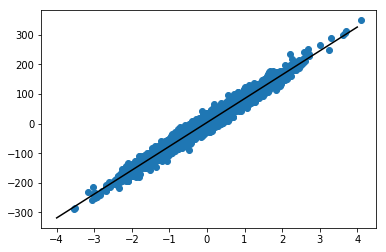

In [39]:
x = np.linspace(-4, 4, 20)
plt.scatter(X, Y)
plt.plot(x, lr.predict(x.reshape(-1, 1)), color='black')

In [103]:
def hypothesis(theta, X):
    return theta[0] + theta[1]*X

def gradient(theta, X, Y):
    m = X.shape[0]
    grad = np.zeros((2,))
    
    for i in range(m):
        hx = hypothesis(theta, X[i])
        grad[0] = grad[0] + (hx - Y[i])
        grad[1] = grad[1] + (hx - Y[i])*X[i]
        
    return grad

def gradientDescent(X, Y, lr = 0.0001):
    theta = np.random.randn(2,)
    errlist = []

    for i in range(500):
        grad = gradient(theta, X, Y)
        theta[0] = theta[0] - lr*grad[0]
        theta[1] = theta[1] - lr*grad[1]
        errlist.append(error(X, Y, theta))
        i += 1
        
    return theta, errlist
        
def error(X, Y, theta):
    err = 0.0
    
    for i in range(X.shape[0]):
        hx = hypothesis(theta, X[i])
        err += (hx-Y[i])**2
        
    return err/2

In [104]:
th, el = gradientDescent(X, Y)

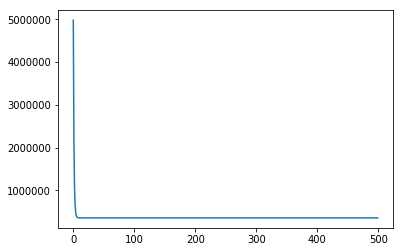

In [105]:
plt.plot(el)

In [106]:
print(el[0], el[-1])
# [5106641.54522787] [358041.71132353]
# [5133899.09351819] [358041.71132353]

[4977390.01686619] [358041.71132353]


In [107]:
th

array([ 3.72798828, 80.54363185])

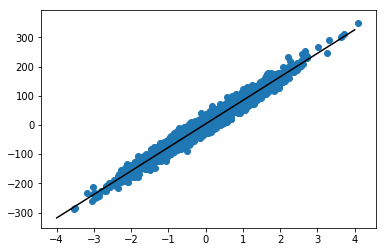

In [108]:
x = np.linspace(-4, 4, 20)
y = th[1]*x + th[0]
plt.plot(x, y, c='black')
plt.scatter(X, Y)

In [116]:
pred = hypothesis(th, X).reshape((-1,))

In [127]:
print(np.sum(np.abs(pred - Y) < 20)/Y.shape[0]*100)

85.25333333333333


In [118]:
Y.shape

(3750,)

In [119]:
print(Y)

[-9.11011171e-02 -5.34677208e+01  7.54570088e+01 ... -3.49832749e+01
  1.45206092e+02 -1.71244939e+01]


In [131]:
X_test = pd.read_csv("../Linear Regression (Challenge)/Linear_X_Test.csv").values

In [132]:
Y_test = hypothesis(th, X_test)

In [134]:
Y_test.shape

(1250, 1)

In [135]:
X_test.shape

(1250, 1)

In [136]:
op = pd.DataFrame(Y_test)

In [138]:
op.shape

(1250, 1)

In [141]:
op.to_csv("pred.csv", header=["y"], index=False)